# Exercise 2

## Exercise H2.1: Connectionist Neuron

In [2]:
import numpy as np

data = np.loadtxt("applesOranges.csv", delimiter=",", skiprows=1)

In [3]:
X, y = data[:,:2], data[:,2:]

In [4]:
def transfer_func(h):
    if h >= 0:
        return 1
    return 0

In [5]:
def predict_y(x, w, bias):
    return transfer_func(w.T @ x - bias)

### Plot data

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

scatter = ax.scatter(x=X[:,0], y=X[:,1], c=y, cmap="bwr")
# produce a legend with the unique colors from the scatter
# not actually specified which ones are apples/oranges
# ax.legend(handles=scatter.legend_elements()[0], labels=["apples", "oranges"],
#                    loc="lower left", title="Classes")
ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
plt.show()

<Figure size 640x480 with 1 Axes>

### Predictions using rotated weight vectors

In [7]:
bias = 0

In [8]:
rotation_degs = np.linspace(0, 180, 19)
rotation_degs

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180.])

In [9]:
def rotate_by_w_gamma(w, gamma):
    theta = np.deg2rad(gamma)
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    return R @ w

In [10]:
w1 = np.array([1, 0])
W = np.array([rotate_by_w_gamma(w1, gamma) for gamma in rotation_degs])
print(W)

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.84807753e-01  1.73648178e-01]
 [ 9.39692621e-01  3.42020143e-01]
 [ 8.66025404e-01  5.00000000e-01]
 [ 7.66044443e-01  6.42787610e-01]
 [ 6.42787610e-01  7.66044443e-01]
 [ 5.00000000e-01  8.66025404e-01]
 [ 3.42020143e-01  9.39692621e-01]
 [ 1.73648178e-01  9.84807753e-01]
 [ 6.12323400e-17  1.00000000e+00]
 [-1.73648178e-01  9.84807753e-01]
 [-3.42020143e-01  9.39692621e-01]
 [-5.00000000e-01  8.66025404e-01]
 [-6.42787610e-01  7.66044443e-01]
 [-7.66044443e-01  6.42787610e-01]
 [-8.66025404e-01  5.00000000e-01]
 [-9.39692621e-01  3.42020143e-01]
 [-9.84807753e-01  1.73648178e-01]
 [-1.00000000e+00  1.22464680e-16]]


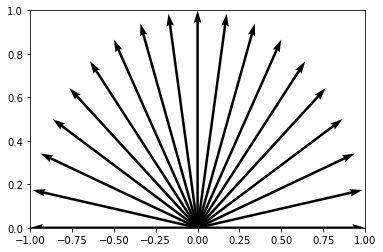

In [11]:
fig, ax = plt.subplots()

ax.quiver(np.zeros(W.shape)[:,0], np.zeros(W.shape)[:,1], W[:,0], W[:,1],
         angles='xy', scale_units='xy', scale=1)
ax.set_xlim((-1, 1))
ax.set_ylim((0, 1))
plt.show()

In [12]:
accuracies = []

for w in W:
    y_pred = np.array([predict_y(x, w, bias) for x in X])
    acc = np.mean(y[:,0] == y_pred)
    accuracies.append(acc)
    
accuracies

[0.675,
 0.705,
 0.76,
 0.745,
 0.71,
 0.735,
 0.755,
 0.75,
 0.725,
 0.69,
 0.63,
 0.6,
 0.565,
 0.52,
 0.505,
 0.465,
 0.42,
 0.35,
 0.325]

Text(0, 0.5, 'accurracy')

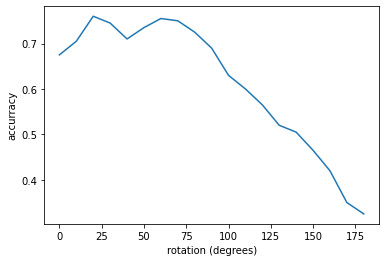

In [13]:
fig, ax = plt.subplots()

ax.plot(rotation_degs, accuracies)
ax.set_xlabel("rotation (degrees)")
ax.set_ylabel("accurracy")

In [14]:
best_w = W[np.argmax(accuracies)]
best_w

array([0.93969262, 0.34202014])

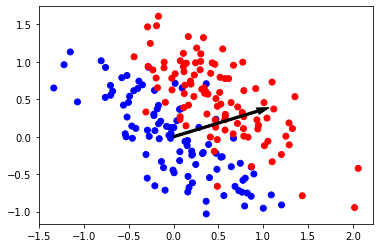

In [15]:
fig, ax = plt.subplots()

ax.arrow(*[0, 0], *best_w, width=0.03, color="black")
ax.scatter(x=X[:,0], y=X[:,1], c=y, cmap="bwr")

In [16]:
import seaborn as sns
import pandas as pd

sns.set_theme()

def plot_classification(w, y_pred):
    df = pd.read_csv("applesOranges.csv")
    if y_pred is not None:
        df["y_pred"] = y_pred
    else:
        df["y_pred"] = 1
    fig, ax = plt.subplots()
    ax.arrow(*[0, 0], *best_w, width=0.03, color="black")
    sns.scatterplot(data=df, x="x.1", y="x.2", style="y", hue="y_pred", ax=ax)


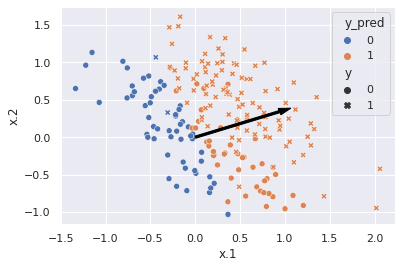

In [17]:
y_pred = np.array([predict_y(x, best_w, bias) for x in X])
plot_classification(best_w, y_pred)

### Vary bias

In [18]:
biases = np.linspace(-3, 3, 1000)

accuracies = []

for bias in biases:
    y_pred = np.array([predict_y(x, best_w, bias) for x in X])
    acc = np.mean(y[:,0] == y_pred)
    accuracies.append(acc)
    
accuracies

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5

In [19]:
best_bias = biases[np.argmax(accuracies)]
best_bias

0.1351351351351351

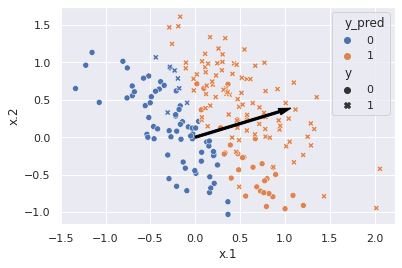

In [20]:
y_pred = np.array([predict_y(x, best_w, best_bias) for x in X])
plot_classification(best_w, y_pred)

### Grid search of best parameters

In [21]:
Accuracies = np.zeros((len(W), len(biases)))

for i, w in enumerate(W):
    for j, bias in enumerate(biases):
        y_pred = np.array([predict_y(x, w, bias) for x in X])
        acc = np.mean(y[:,0] == y_pred)
        Accuracies[i, j] = acc

<AxesSubplot:>

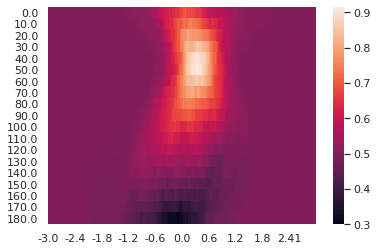

In [25]:
fig, ax = plt.subplots()

df_acc = pd.DataFrame(Accuracies)

# https://stackoverflow.com/q/27037241
xticks = biases.round(2)
keptticks = xticks[::int(len(xticks)/10)]
xticks = ["" for y in xticks]
xticks[::int(len(xticks)/10)] = keptticks

sns.heatmap(df_acc, xticklabels=xticks, yticklabels=rotation_degs, ax=ax)

In [3]:
import pandas as pd

pd.get_dummies([1,2,1,1])

,1,2
0,1,0
1,0,1
2,1,0
3,1,0
